##General Code

In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pysentani

In [3]:
survey = pd.read_excel('../data-clean/sentani-merged-cleaned-2015-06-10.xlsx',na_values=[''])
print('number of entries =', len(survey))
print('number of columns =', len(survey.columns))

number of entries = 1184
number of columns = 274


In [4]:
pysentani.similar_columns(survey,'HP')

HP_y_n
HP
HP_charging_source
HP_charging_price
HP_charging_frequency
HP_quantity


In [5]:
survey['electricity_expenditure_monthly'] = pysentani.elec_expenditure_monthly(survey)
survey['electricity_expenditure_monthly_log'] = survey['electricity_expenditure_monthly'].dropna().replace(0, 1)
survey['electricity_expenditure_monthly_log'] = np.log10(survey['electricity_expenditure_monthly_log'])
survey['income_monthly'] = pysentani.income_monthly(survey)
survey['access_type'] = pysentani.access_type(survey)
survey['income_monthly'] = survey['income_monthly'].replace(0, 1)
survey['income_monthly_log'] = np.log10(survey['income_monthly'])

##Create New Data Frame to Hold Percent Ownership Data

In [6]:
household_survey = survey[survey['demand_point'] == 'household']

app_series = ['app_buy/rice_cooker','app_buy/TV','app_buy/fridge','app_buy/fan','app_buy/lighting','app_buy/radio']



def get_ownership(app):
    app_now = 'app_now' + app[7:]
    return app_now

pao_ls = []

for aps in app_series:
    
    ownership = get_ownership(aps)
    at_series = ['PLN_grid','PLN_microgrid','community_microgrid','no_access'] 
    temp_app_df = pd.crosstab(household_survey[household_survey[ownership] == False]['access_type'],household_survey[aps])
    
    for ats in at_series:
        percent_demand = (temp_app_df[1.0][ats]/(temp_app_df[1.0][ats] + temp_app_df[0.0][ats])) * 100
        pao_ls.append({'Access Type':ats,'Appliance':aps,'percent_demand':percent_demand})


pao_df = pd.DataFrame(pao_ls)


pao_df['Appliance'] = pao_df['Appliance'].str[8:]

pao_df.replace(to_replace = {'Access Type': {'PLN_grid': 'PLN Grid',
                                                       'community_microgrid': 'Community Microgrid',
                                                       'PLN_microgrid': 'PLN Microgrid',
                                                       'no_access': 'No Access'}},
                                                       inplace = True)
pao_df

,Access Type,Appliance,percent_demand
0,PLN Grid,rice_cooker,32.246377
1,PLN Microgrid,rice_cooker,20.370370
2,Community Microgrid,rice_cooker,41.025641
3,No Access,rice_cooker,28.654971
4,PLN Grid,TV,74.025974
5,PLN Microgrid,TV,73.684211
6,Community Microgrid,TV,100.000000
7,No Access,TV,80.645161
8,PLN Grid,fridge,73.529412
9,PLN Microgrid,fridge,20.560748


##Format and Display Plot of Percent Appliance Ownership by Access Type

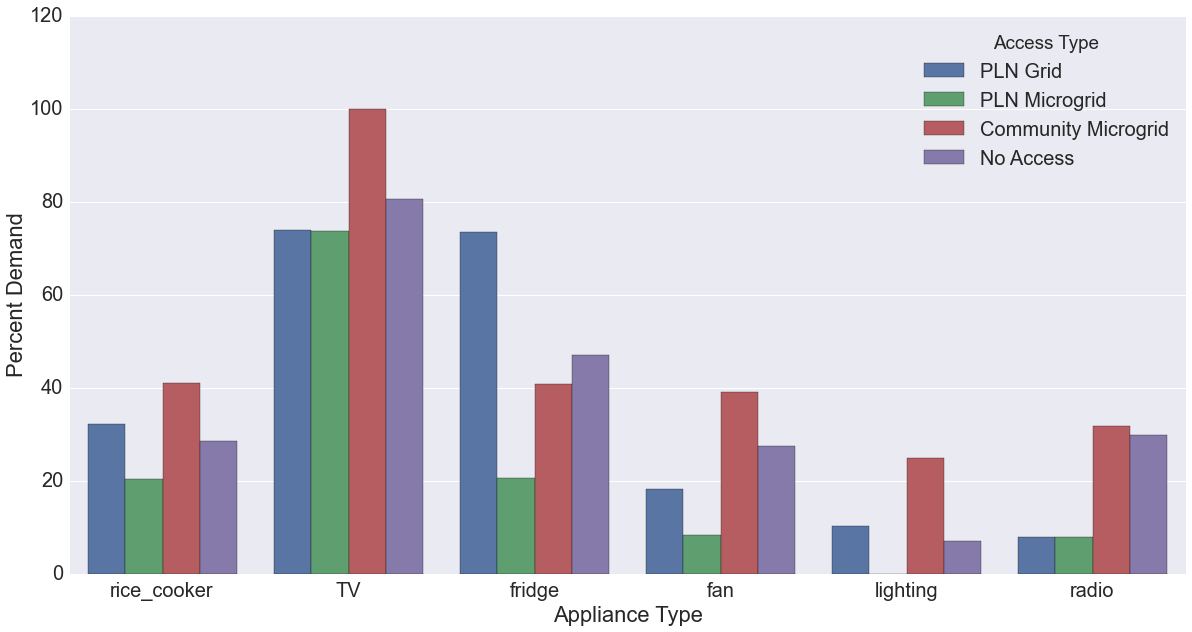

In [7]:
sns.set(font_scale = 2)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

fig, ax = plt.subplots()

ax = sns.barplot(x="Appliance", y="percent_demand", hue="Access Type", data=pao_df)


ax.set(xlabel='Appliance Type', ylabel='Percent Demand')

plt.ylim(0,120)

fig.savefig('test.pdf')


This graph shows - divided by access type - the percent of non-owners who said they would like to buy specific appliances.

It is interesting to note the high desire for TVs, well above 60% for all access types.  

It is also interesting to look at the high demand for appliances which require grid, even by no access households.

Idea:  If grid is expanded to these households: look at how many actually buy these appliances (compared to how many expressed interest in doing so) to get an idea of how accurately these percentages predict future appliance purchases.

(0, 120)

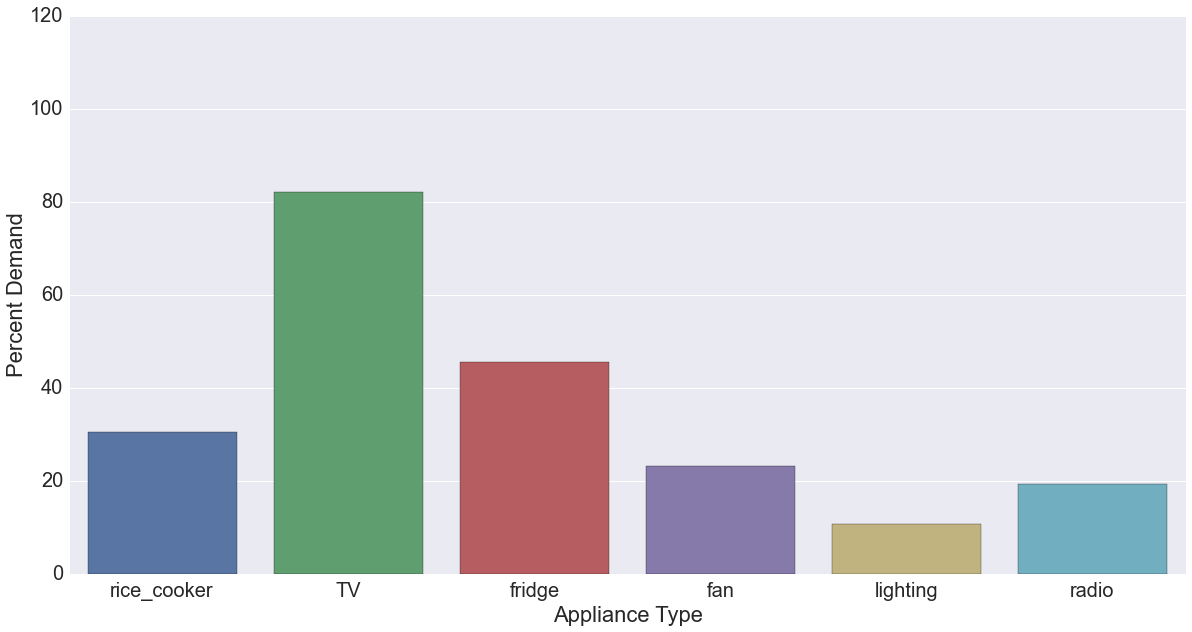

In [10]:
sns.set(font_scale = 2)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

fig, ax = plt.subplots()

ax = sns.barplot(x="Appliance", y="percent_demand", data=pao_df, ci = None)

#ax.set_xticklabels(app_name_ls)
ax.set(xlabel='Appliance Type', ylabel='Percent Demand')

plt.ylim(0,120)